# Gallery of mHVSR Examples Automatically Checked with SESAME (2004) Reliability and Clarity Criteria

## License Information

This file is part of _hvsrpy_, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2025 Joseph P. Vantassel (joseph.p.vantassel@gmail.com)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_

_hvsrpy_ is an open-source Python package for performing horizontal-to-vertical spectral ratio (HVSR) processing
of microtremor and earthquake recordings. _hvsrpy_ was developed by [Joseph P. Vantassel](https://www.jpvantassel.com/)
with contributions from Dana M. Brannon under the supervision of Professor Brady R. Cox at The University of Texas at Austin.
_hvsrpy_ continues to be developed and maintained by [Joseph P. Vantassel and his research group at Virginia Tech](https://geoimaging-research.org/).

## Citation

If you use `hvsrpy` in your research or consulting, we ask you please cite the
following:

> Vantassel, J.P. (2025). "_hvsrpy_: An Open‐Source Python Package for Microtremor
> and Earthquake Horizontal‐to‐Vertical Spectral Ratio Processing". Seismological
> Research Letters. 96 (4): 2671–2682,
> [https://doi.org/10.1785/0220240395](https://doi.org/10.1785/0220240395)

> Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
> [http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_For software, version specific citations should be preferred to
general concept citations. To generate a version specific citation
for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._

## About this notebook

This notebook illustrates using _hvsrpy_ to automatically check the SESAME (2004) reliability and clarity critera.

This notebook implements automatic checking of the SESAME (2004) reliability and clarity critera.
To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.

The microtremor data presented are those by Cox and Vantassel (2018).
If you use this data, please also cite Cox and Vantassel (2018).

> Cox, B.R. and Vantassel, J.P. (2018). Dynamic Characterization of Wellington, New Zealand. DesignSafe-CI [publisher]. https://doi.org/10.17603/DS24M6J

Happy Processing!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import hvsrpy
from hvsrpy.sesame import reliability, clarity
from hvsrpy.hvsr_geopsy import HvsrGeopsy

plt.style.use(hvsrpy.HVSRPY_MPL_STYLE)

In [2]:
def process(hvsrpy_file):
    preprocessing_settings = hvsrpy.HvsrPreProcessingSettings()
    processing_settings = hvsrpy.HvsrTraditionalProcessingSettings()
    processing_settings.smoothing = dict(operator='konno_and_ohmachi',
                                         bandwidth=40,
                                         center_frequencies_in_hz=np.geomspace(0.2, 20, 128))
    srecords = hvsrpy.read([[hvsrpy_file]])
    srecords = hvsrpy.preprocess(srecords, preprocessing_settings)
    hvsr = hvsrpy.process(srecords, processing_settings)
    return hvsr

def sesame(hvsr):
    print("\nSESAME (2004) Clarity and Reliability Criteria:")
    print("-"*47)
    verbose=2
    search_range_in_hz=(None, None)
    _ = reliability(
        windowlength=hvsr.meta["split"],
        passing_window_count=np.sum(hvsr.valid_window_boolean_mask),
        frequency=hvsr.frequency,
        mean_curve=hvsr.mean_curve(distribution="lognormal"),
        std_curve=hvsr.std_curve(distribution="lognormal"),
        search_range_in_hz=search_range_in_hz,
        verbose=verbose,
    )
    _ = clarity(
        frequency=hvsr.frequency,
        mean_curve=hvsr.mean_curve(distribution="lognormal"),
        std_curve=hvsr.std_curve(distribution="lognormal"),
        fn_std=hvsr.std_fn_frequency(distribution="normal"),
        search_range_in_hz=search_range_in_hz,
        verbose=verbose,
    )

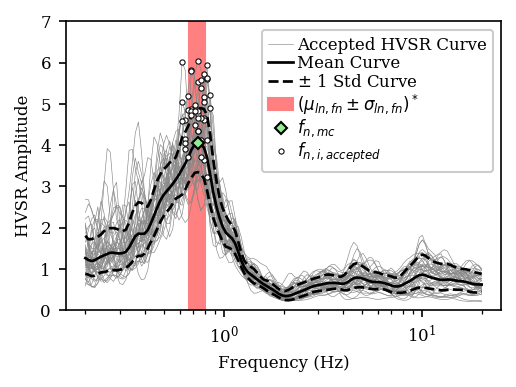


SESAME (2004) Clarity and Reliability Criteria:
-----------------------------------------------
Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    fnmc=0.738 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(fnmc)=1904 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.411 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[fnmc/4,fnmc])=1.192 is < A0[fnmc]/2=4.044/2=2.022
  Criteria ii): Pass
    min(A[fnmc,fnmc*4])=0.341 is < A0[fnmc]/2=4.044/2=2.022
  Criteria iii): Pass
    A0[fnmc]=4.044 is > 2.0
  Criteria iv): Pass
    fn_upper=0.765 is within 5% of fnmc=0.738.
    fn_lower=0.738 is within 5% of fnmc=0.738.
  Criteria v): Pass
    fn_std=0.069 is less than epsilon*mc_peak_frq=0.150*0.738=0.111.
  Criteria vi): Pass
    sigma_a_peak=1.208 is less than theta=2.000.
  The chosen peak PASSES the peak clarity criteria, with 6 of 6.


In [3]:
# example 1
hvsrpy_file = "./data/UT.STN11.A2_C150.miniseed"
hvsr = process(hvsrpy_file)
_ = hvsrpy.frequency_domain_window_rejection(hvsr)
fig, ax = hvsrpy.plot_single_panel_hvsr_curves(hvsr)
plt.show()
plt.close()
sesame(hvsr)

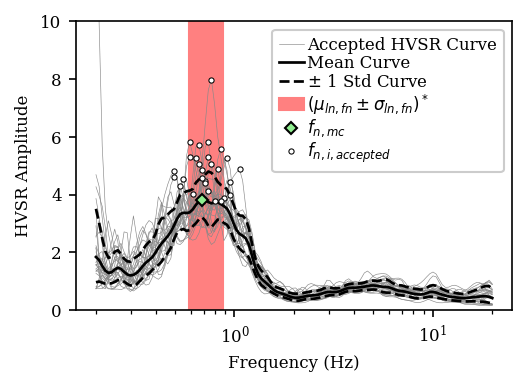


SESAME (2004) Clarity and Reliability Criteria:
-----------------------------------------------
Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    fnmc=0.686 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(fnmc)=1153 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.378 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[fnmc/4,fnmc])=1.202 is < A0[fnmc]/2=3.832/2=1.916
  Criteria ii): Pass
    min(A[fnmc,fnmc*4])=0.430 is < A0[fnmc]/2=3.832/2=1.916
  Criteria iii): Pass
    A0[fnmc]=3.832 is > 2.0
  Criteria iv): Fail
    fn_upper=0.738 is not within 5% of fnmc=0.686.
    fn_lower=0.686 is within 5% of fnmc=0.686.
  Criteria v): Fail
    fn_std=0.145 is not less than epsilon*mc_peak_frq=0.150*0.686=0.103.
  Criteria vi): Pass
    sigma_a_peak=1.192 is less than theta=2.000.
  The chosen peak FAILS the peak clarity criteria, with 4 of 6.


In [4]:
# example 2
hvsrpy_file = "./data/UT.STN12.A2_C50.miniseed"
hvsr = process(hvsrpy_file)
_ = hvsrpy.frequency_domain_window_rejection(hvsr)
fig, ax = hvsrpy.plot_single_panel_hvsr_curves(hvsr)
ax.set_ylim(0, 10)
plt.show()
plt.close()
sesame(hvsr)

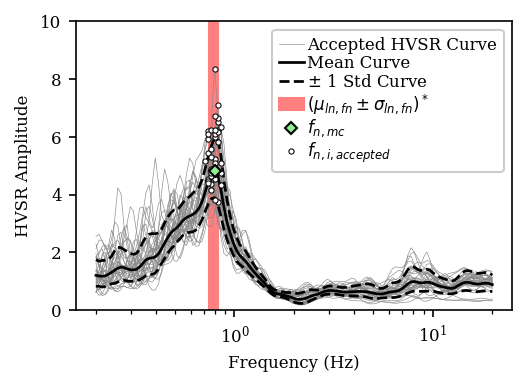


SESAME (2004) Clarity and Reliability Criteria:
-----------------------------------------------
Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    fnmc=0.793 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(fnmc)=1761 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.434 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[fnmc/4,fnmc])=1.174 is < A0[fnmc]/2=4.825/2=2.412
  Criteria ii): Pass
    min(A[fnmc,fnmc*4])=0.373 is < A0[fnmc]/2=4.825/2=2.412
  Criteria iii): Pass
    A0[fnmc]=4.825 is > 2.0
  Criteria iv): Pass
    fn_upper=0.823 is within 5% of fnmc=0.793.
    fn_lower=0.793 is within 5% of fnmc=0.793.
  Criteria v): Pass
    fn_std=0.039 is less than epsilon*mc_peak_frq=0.150*0.793=0.119.
  Criteria vi): Pass
    sigma_a_peak=1.237 is less than theta=2.000.
  The chosen peak PASSES the peak clarity criteria, with 6 of 6.


In [5]:
# example 3
hvsrpy_file = "./data/UT.STN12.A2_C150.miniseed"
hvsr = process(hvsrpy_file)
_ = hvsrpy.frequency_domain_window_rejection(hvsr)
fig, ax = hvsrpy.plot_single_panel_hvsr_curves(hvsr)
ax.set_ylim(0, 10)
plt.show()
plt.close()
sesame(hvsr)

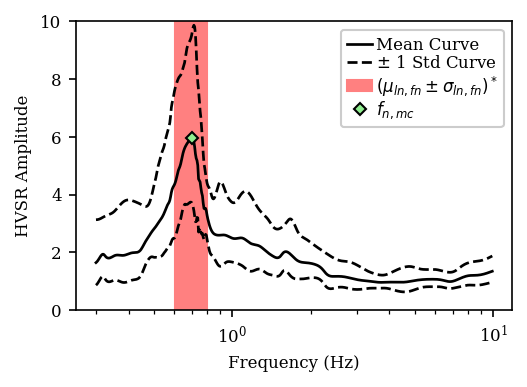


SESAME (2004) Clarity and Reliability Criteria:
-----------------------------------------------
Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    fnmc=0.703 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(fnmc)=2529 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.987 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[fnmc/4,fnmc])=1.647 is < A0[fnmc]/2=5.961/2=2.980
  Criteria ii): Pass
    min(A[fnmc,fnmc*4])=1.120 is < A0[fnmc]/2=5.961/2=2.980
  Criteria iii): Pass
    A0[fnmc]=5.961 is > 2.0
  Criteria iv): Pass
    fn_upper=0.712 is within 5% of fnmc=0.703.
    fn_lower=0.693 is within 5% of fnmc=0.703.
  Criteria v): Pass
    fn_std=0.098 is less than epsilon*mc_peak_frq=0.150*0.703=0.105.
  Criteria vi): Pass
    sigma_a_peak=1.619 is less than theta=2.000.
  The chosen peak PASSES the peak clarity criteria, with 6 of 6.


In [6]:
# example 4: from SESAME guidelines
hvsr = HvsrGeopsy.from_file("./data/sesame/ex4.hv")
# start monkey patch HvsrGeopsy
hvsr.meta = dict(split=60)
hvsr.valid_window_boolean_mask = np.full(60, True)
hvsr.std_fn_frequency = lambda distribution : 0.098
hvsr.nth_std_fn_frequency = lambda n, distribution : 0.7 + n*0.098
# end monkey patch HvsrGeopsy
fig, ax = hvsrpy.plot_single_panel_hvsr_curves(hvsr,
                                               plot_valid_curves=False,
                                               plot_frequency_std=True,
                                               plot_peak_individual_valid_curves=False,
                                              )
ax.set_ylim(0, 10)
plt.show()
plt.close()
sesame(hvsr)